# Exploratory Data Analysis (EDA) and Feature Engineering

In this notebook, I will perform exploratory data analysis (EDA) on the cleaned credit card customer data to better understand patterns, relationships, and distributions of variables that may influence customer churn.  

Insights from EDA will guide the creation of meaningful features that could improve the performance of our predictive models.  

### Note on Univariate Analysis

Univariate analysis for both numerical and categorical features was already performed during the **Data Cleaning** stage:

- **Numerical features:**  
  - **Skewness:** Specifically examined `Income`, `CreditLimit`, and `TotalSpend`, as these columns contained missing values and required careful handling for imputation and potential transformation.  
  - **Outliers:** All numerical features were checked for outliers using the **IQR method**. Outliers were **capped** rather than removed to preserve dataset size while reducing the influence of extreme values.

- **Categorical features:**  
  Frequency counts and distributions were assessed.  
  - Low-cardinality features were **one-hot encoded**.  
  - High-cardinality features were **frequency encoded** to retain predictive information without inflating dimensionality.

As a result, the dataset has already been cleaned and transformed at a univariate level, allowing this notebook to focus on:

- Bivariate analysis of features and the target variable  
- Correlation analysis  
- Feature Engineering
- Encoding categorical variables and preparing data for modeling

In [1]:
# Import necessary libraries
import pandas as pd

# Load the cleaned dataset saved from the previous step
cleaned_data_path = r'..\..\data\processed\credit_card_attrition_cleaned.csv'
df = pd.read_csv(cleaned_data_path)

# Display the first few rows to verify loading
df.head()

,Age,Income,CreditLimit,TotalTransactions,TotalSpend,Tenure,AttritionFlag,Feature_0,Feature_1,Feature_2,...,MaritalStatus_Widowed,EducationLevel_Bachelor,EducationLevel_High School,EducationLevel_Master,EducationLevel_PhD,CardType_Black,CardType_Gold,CardType_Platinum,CardType_Silver,Country_FE
0,45.0,112955.763499,18089.293599,102.0,7057.961760,3.0,0,-0.434767,0.119666,-0.318213,...,False,False,False,True,False,False,False,True,False,1037
1,44.0,42980.787139,17317.747673,94.0,8101.572278,9.0,0,0.538034,-0.258189,-0.903829,...,False,False,False,False,True,False,True,False,False,945
2,44.0,114584.549890,17450.444657,87.0,10168.196201,16.0,0,-0.566592,0.014330,-0.052454,...,False,True,False,False,False,False,False,False,True,1004
3,40.0,70262.608211,10444.914691,90.0,2534.813451,11.0,0,1.278177,0.288838,-0.992037,...,False,False,False,True,False,False,True,False,False,984
4,47.0,74041.286720,8022.710937,106.0,6290.093235,4.0,0,0.311488,0.109675,0.220423,...,False,False,False,False,True,False,False,True,False,1005


In [2]:
df.columns

Index(['Age', 'Income', 'CreditLimit', 'TotalTransactions', 'TotalSpend',
       'Tenure', 'AttritionFlag', 'Feature_0', 'Feature_1', 'Feature_2',
       'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
       'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12',
       'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
       'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22',
       'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26', 'Feature_27',
       'Feature_28', 'Feature_29', 'Feature_30', 'Feature_31', 'Feature_32',
       'Feature_33', 'Feature_34', 'Feature_35', 'Feature_36', 'Feature_37',
       'Feature_38', 'Feature_39', 'Feature_40', 'Feature_41', 'Feature_42',
       'Feature_43', 'Feature_44', 'Feature_45', 'Feature_46', 'Feature_47',
       'Feature_48', 'Feature_49', 'Is_Female', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'Educ

In [3]:
df.shape

(100000, 71)

## 1. Bivariate analysis of features and the target variable
Goal: Identify features that differ significantly between churned (AttritionFlag=1) and non-churned (AttritionFlag=0) customers.

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

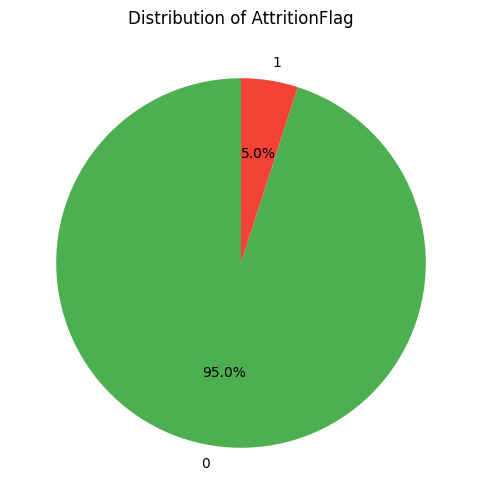

In [5]:
# Count the number of churned and non-churned customers
attrition_counts = df['AttritionFlag'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title('Distribution of AttritionFlag')
plt.show()

In [6]:
# Separate features by type
continuous_features = ['Age', 'Income', 'CreditLimit', 'TotalSpend', 'Tenure', 'TotalTransactions']
boolean_features = ['Is_Female', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 
                    'MaritalStatus_Single', 'MaritalStatus_Widowed',
                    'EducationLevel_Bachelor', 'EducationLevel_High School',
                    'EducationLevel_Master', 'EducationLevel_PhD',
                    'CardType_Black', 'CardType_Gold', 'CardType_Platinum', 'CardType_Silver']
engineered_features = [f'Feature_{i}' for i in range(50)] + ['Country_FE']

In [7]:
# -------------------------------
# 1. Continuous Features
# -------------------------------

print("Bivariate Analysis: Continuous Features\n")

for col in continuous_features:
    print(f"{col} vs AttritionFlag")
    print(df.groupby('AttritionFlag')[col].describe(), "\n")

Bivariate Analysis: Continuous Features

Age vs AttritionFlag
                 count       mean        std   min   25%   50%   75%   max
AttritionFlag                                                             
0              95040.0  44.519960   9.920255  18.5  38.0  45.0  51.0  70.5
1               4960.0  44.303226  10.077587  18.5  37.0  44.0  51.0  70.5 

Income vs AttritionFlag
                 count          mean           std           min  \
AttritionFlag                                                      
0              95040.0  70506.198567  19811.276857  18966.333084   
1               4960.0  70572.360028  19836.965232  18966.333084   

                        25%           50%           75%            max  
AttritionFlag                                                           
0              57458.880265  70262.608211  83108.821336  121616.243133  
1              57525.936524  70262.608211  83511.237179  121616.243133   

CreditLimit vs AttritionFlag
                

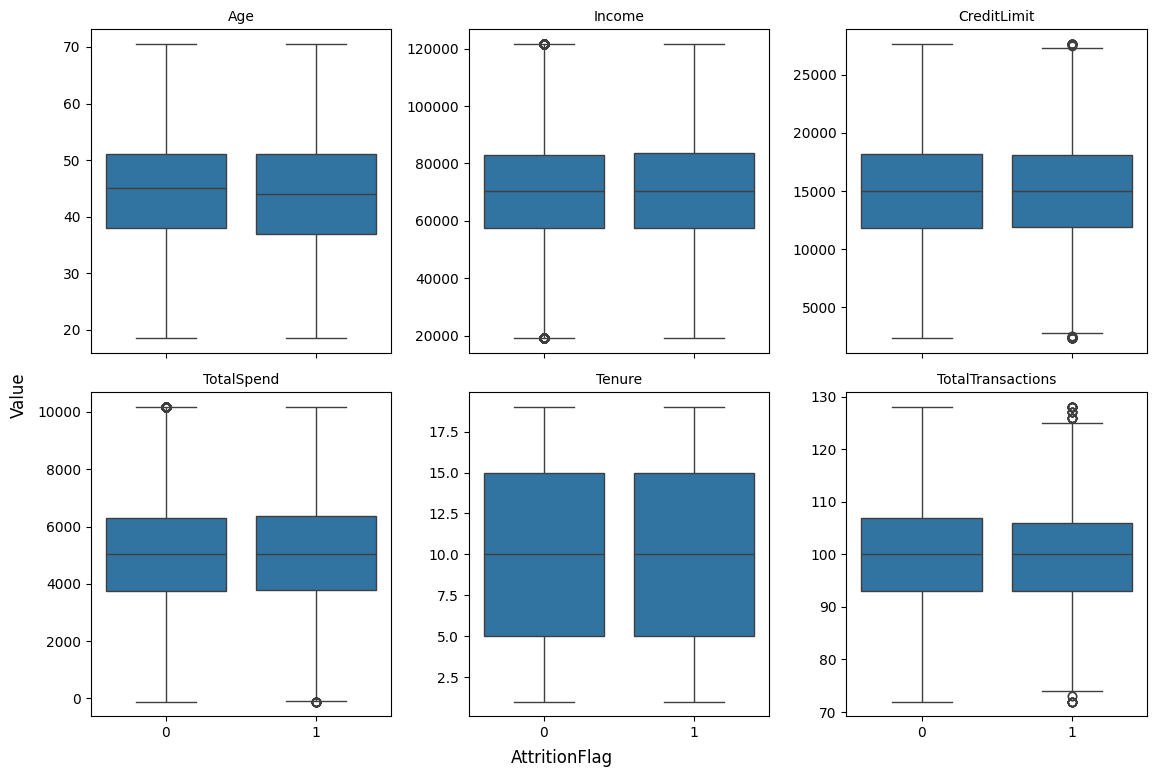

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set folder to save plots
save_folder = r'..\..\reports\figures\EDA_FeatureEng\Continuous_FeaturesVSAttritionFlag'
os.makedirs(save_folder, exist_ok=True)

# Number of rows and columns
rows, cols = 2, 3

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4), sharex=True, sharey=False)
axes = axes.flatten()

for i, col in enumerate(continuous_features):
    sns.boxplot(ax=axes[i], x='AttritionFlag', y=col, data=df)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")  # remove individual x-labels
    axes[i].set_ylabel("")  # remove individual y-labels

# Shared axis labels
fig.text(0.5, 0.04, 'AttritionFlag', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Value', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# Save single PNG
plt.savefig(os.path.join(save_folder, 'continuous_features_boxplots.png'))
plt.show()

*For Continuous features `Age`, `Income`, `CreditLimit`, `TotalSpend`, `Tenure`, `TotalTransactions`,  there are no significant differences in the distributions of continuous features between customers who churned (AttritionFlag = 1) and those who did not (AttritionFlag = 0). This suggests that these continuous features may have limited predictive power for distinguishing churn in this dataset.*

In [9]:
# -------------------------------
# Boolean Features - Print Crosstabs
# -------------------------------
print("Bivariate Analysis: Boolean Features\n")

for col in boolean_features:
    print(f'{col} vs AttritionFlag')
    print(pd.crosstab(df[col], df['AttritionFlag'], normalize='columns'), "\n")  # proportions

Bivariate Analysis: Boolean Features

Is_Female vs AttritionFlag
AttritionFlag         0         1
Is_Female                        
False          0.497801  0.503629
True           0.502199  0.496371 

MaritalStatus_Divorced vs AttritionFlag
AttritionFlag                  0         1
MaritalStatus_Divorced                    
False                   0.747769  0.753226
True                    0.252231  0.246774 

MaritalStatus_Married vs AttritionFlag
AttritionFlag                 0         1
MaritalStatus_Married                    
False                  0.748906  0.746169
True                   0.251094  0.253831 

MaritalStatus_Single vs AttritionFlag
AttritionFlag                0         1
MaritalStatus_Single                    
False                 0.752378  0.757863
True                  0.247622  0.242137 

MaritalStatus_Widowed vs AttritionFlag
AttritionFlag                 0         1
MaritalStatus_Widowed                    
False                  0.750947  0.742742
True 

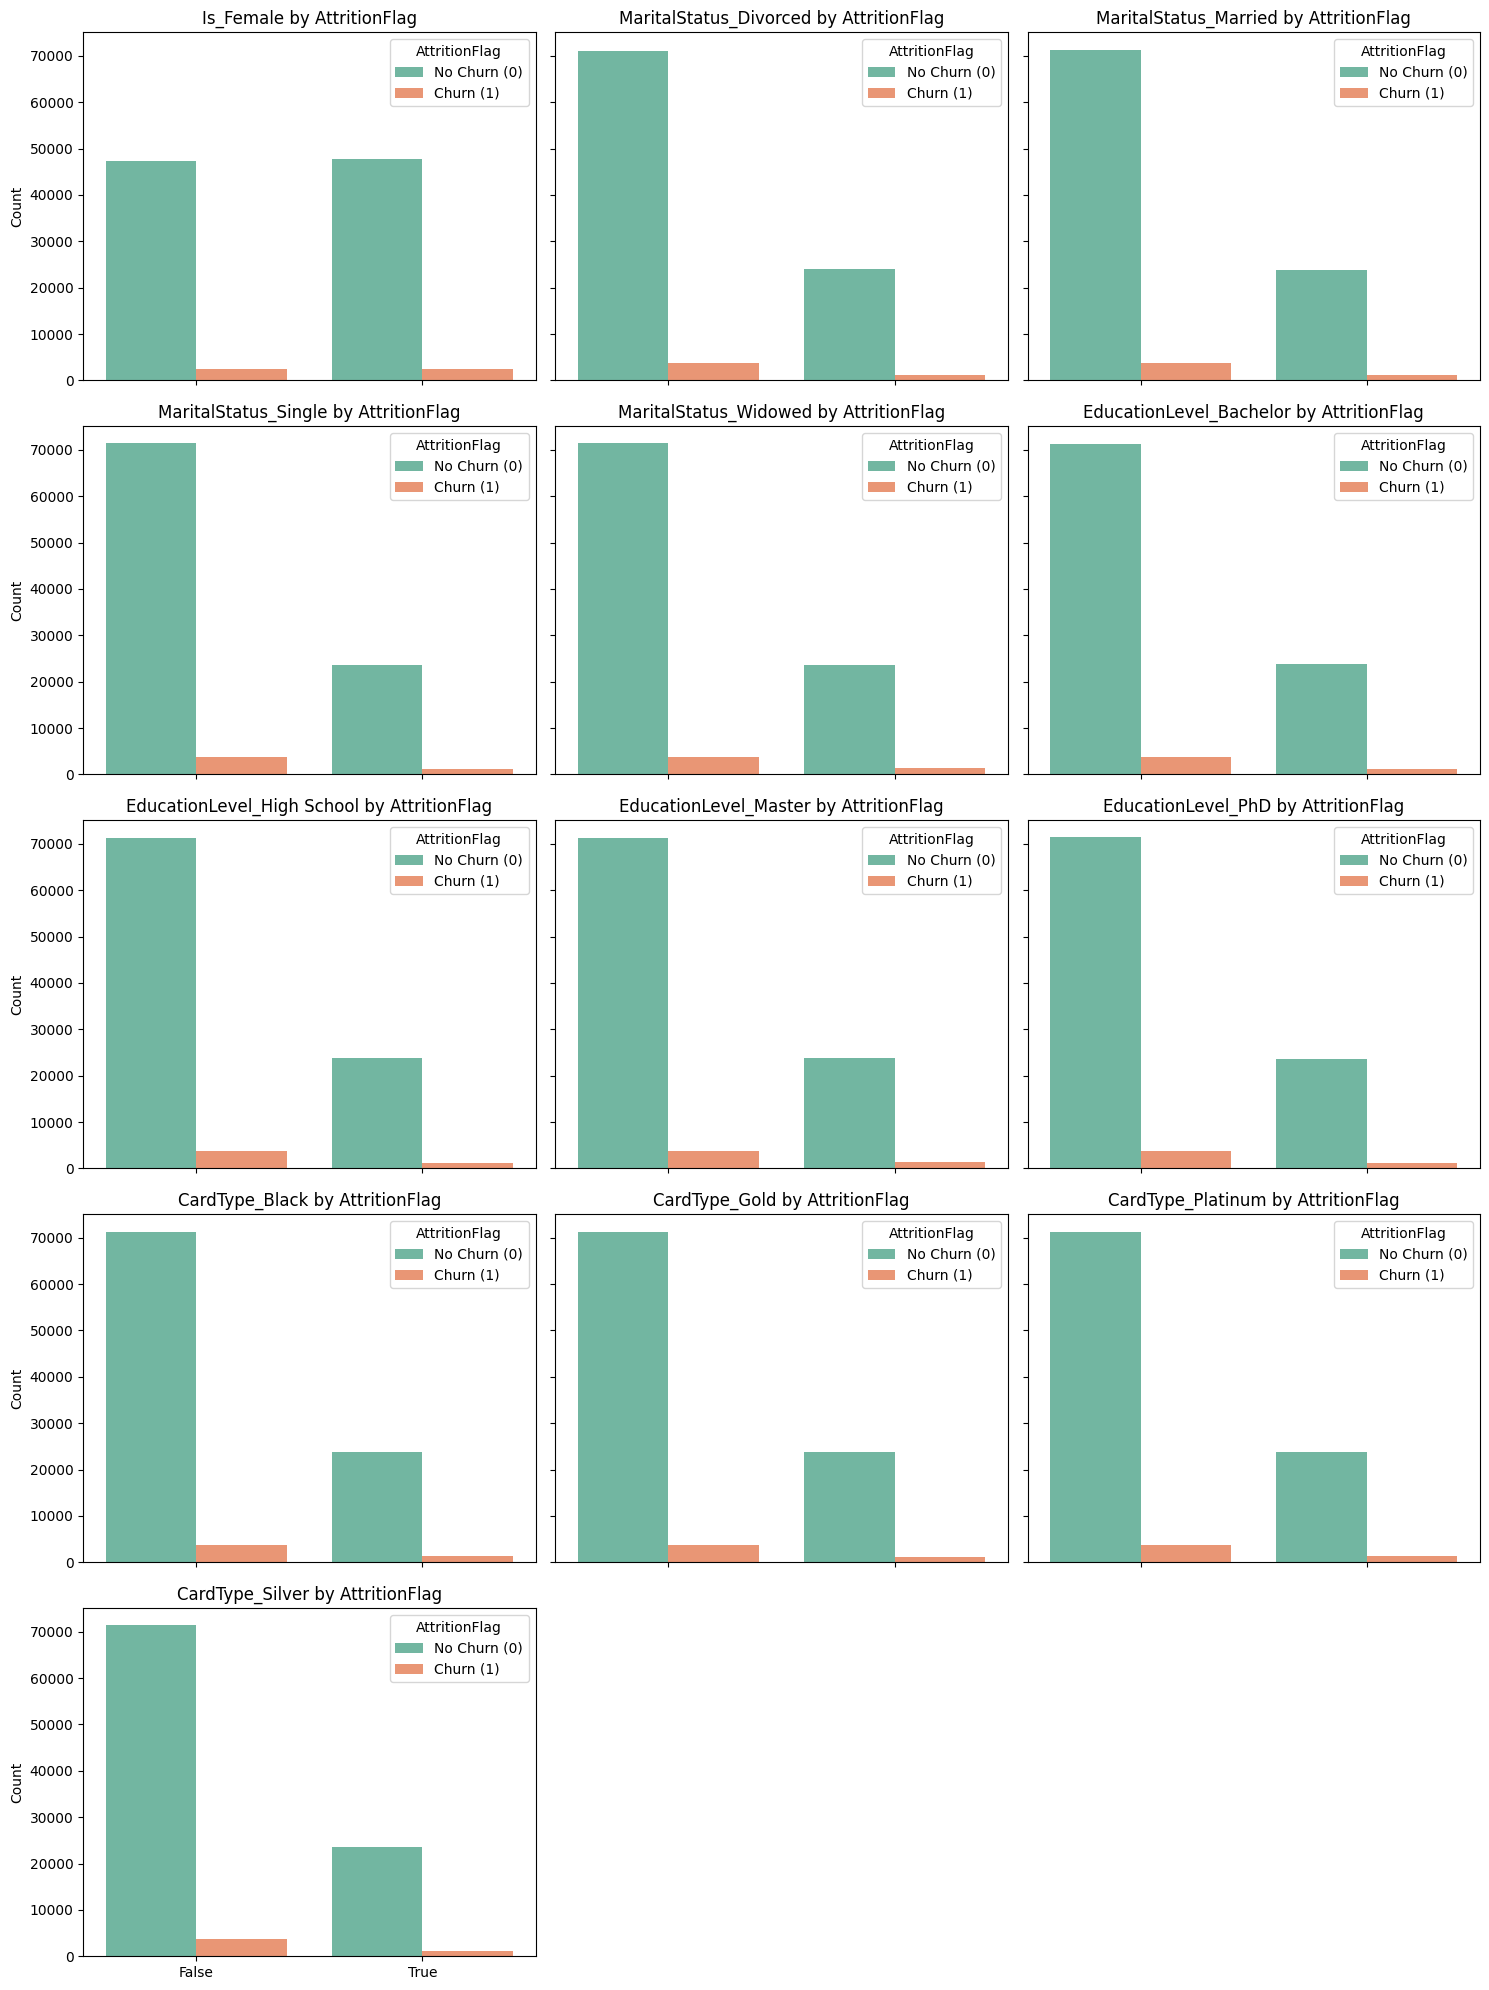

In [10]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

save_folder = r'..\..\reports\figures\EDA_FeatureEng\Boolean_FeaturesVSAttritionFlag'
os.makedirs(save_folder, exist_ok=True)

n_features = len(boolean_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), sharey=True, sharex=True)
axes = axes.flatten()  # Easier indexing

for i, col in enumerate(boolean_features):
    sns.countplot(x=col, hue='AttritionFlag', data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col} by AttritionFlag')
    axes[i].set_xlabel("")  # Remove X-axis label
    axes[i].set_ylabel('Count')
    axes[i].legend(title='AttritionFlag', labels=['No Churn (0)', 'Churn (1)'])

# Remove empty subplots but keep last one centered if applicable
if n_features % n_cols != 0:
    empty_plots = n_cols - (n_features % n_cols)
    for j in range(1, empty_plots + 1):
        fig.delaxes(axes[-j])  # Remove unused axes

plt.tight_layout()
plt.savefig(os.path.join(save_folder, 'boolean_features_barplots.png'))
plt.show()

*Same with continuous variables, the boolean features do not show significant differences between Churn and No Churn.*

In [11]:
# -------------------------------
# Engineered Features - Print Statistics
# -------------------------------
print("Bivariate Analysis: Engineered Features\n")

for col in engineered_features:
    print(f"{col} vs AttritionFlag")
    print(df.groupby('AttritionFlag')[col].mean(), "\n")

Bivariate Analysis: Engineered Features

Feature_0 vs AttritionFlag
AttritionFlag
0    0.005015
1   -0.015395
Name: Feature_0, dtype: float64 

Feature_1 vs AttritionFlag
AttritionFlag
0    0.000236
1   -0.025801
Name: Feature_1, dtype: float64 

Feature_2 vs AttritionFlag
AttritionFlag
0    0.000251
1   -0.007975
Name: Feature_2, dtype: float64 

Feature_3 vs AttritionFlag
AttritionFlag
0   -0.002941
1    0.000131
Name: Feature_3, dtype: float64 

Feature_4 vs AttritionFlag
AttritionFlag
0    0.001192
1    0.000999
Name: Feature_4, dtype: float64 

Feature_5 vs AttritionFlag
AttritionFlag
0    0.003771
1    0.000774
Name: Feature_5, dtype: float64 

Feature_6 vs AttritionFlag
AttritionFlag
0    0.000116
1   -0.019371
Name: Feature_6, dtype: float64 

Feature_7 vs AttritionFlag
AttritionFlag
0   -0.001437
1    0.007377
Name: Feature_7, dtype: float64 

Feature_8 vs AttritionFlag
AttritionFlag
0   -0.000671
1    0.008495
Name: Feature_8, dtype: float64 

Feature_9 vs AttritionFlag
Attri

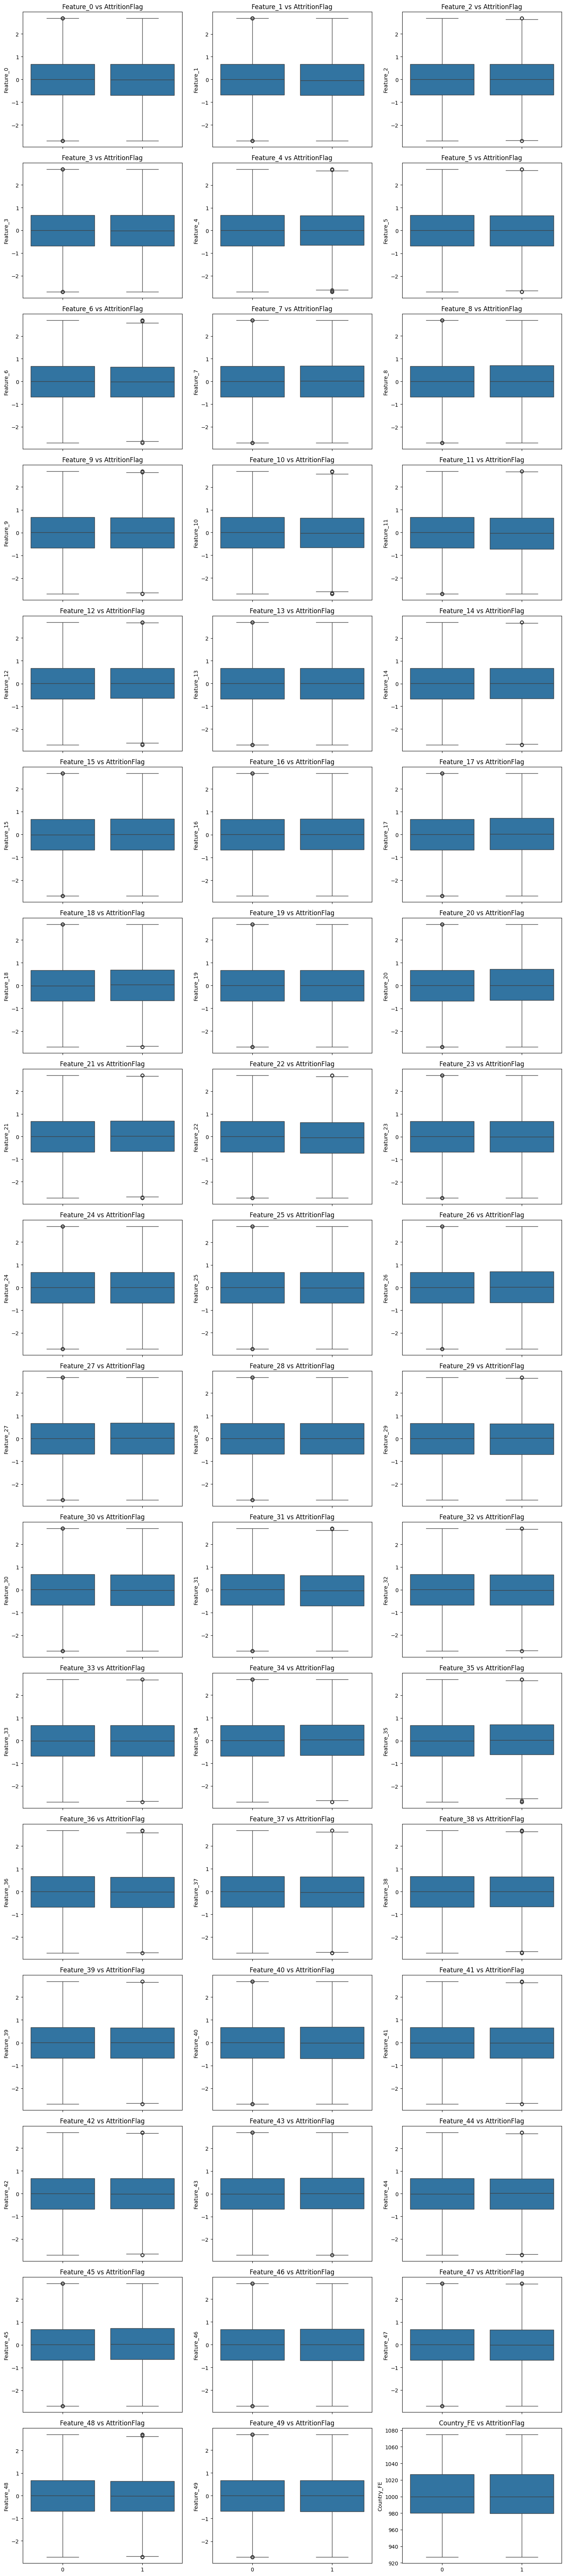

In [12]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os

save_folder = r'..\..\reports\figures\EDA_FeatureEng\Engineered_FeaturesVSAttritionFlag'
os.makedirs(save_folder, exist_ok=True)

n_features = len(engineered_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), sharey=False, sharex=True)
axes = axes.flatten()

for i, col in enumerate(engineered_features):
    sns.boxplot(x='AttritionFlag', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs AttritionFlag')
    axes[i].set_xlabel('')  # Remove X label
    axes[i].set_ylabel(col)

# Remove extra empty subplots
if n_features % n_cols != 0:
    empty_plots = n_cols - (n_features % n_cols)
    for j in range(1, empty_plots + 1):
        fig.delaxes(axes[-j])

plt.tight_layout()
plt.savefig(os.path.join(save_folder, 'engineered_features_boxplots.png'))
plt.show()

*The bivariate analysis of the engineered features (`Feature_0` to `eature_49` and `Country_FE`) against the target variable AttritionFlag shows that the mean values of each feature are very similar between employees who stayed (`0`) and those who left (`1`).*

### Bivariate Analysis Conclusion
The bivariate analysis shows minimal differences between the features and the target variable (`AttritionFlag`). Continuous, boolean, and engineered features all exhibit similar distributions across the target classes. Overall, no individual feature demonstrates a significant relationship with attrition, indicating that predictive patterns may require modeling feature interactions or more advanced techniques.

## 2. Correlation Analysis

Goal: Discover highly correlated features to inform which features to combine, transform, or drop during feature engineering.

In [13]:
# Spearman correlation
corr_matrix = df.corr(method='spearman')

pd.set_option('display.max_rows', None) 

# Correlation with target
target_corr = corr_matrix['AttritionFlag'].sort_values(ascending=False)
print(target_corr)

AttritionFlag                 1.000000
Feature_35                    0.008626
Feature_45                    0.006465
CardType_Black                0.005869
Feature_34                    0.005443
EducationLevel_Master         0.004201
Feature_17                    0.004144
MaritalStatus_Widowed         0.004117
Feature_26                    0.004028
Feature_18                    0.003892
Feature_20                    0.003836
Feature_21                    0.003453
Feature_12                    0.003134
CardType_Platinum             0.002665
Feature_7                     0.002643
Feature_27                    0.002351
EducationLevel_PhD            0.002211
Feature_8                     0.002190
TotalSpend                    0.002106
Feature_16                    0.001492
MaritalStatus_Married         0.001370
Feature_46                    0.001192
Feature_14                    0.000902
Income                        0.000877
Feature_24                    0.000877
Feature_43               

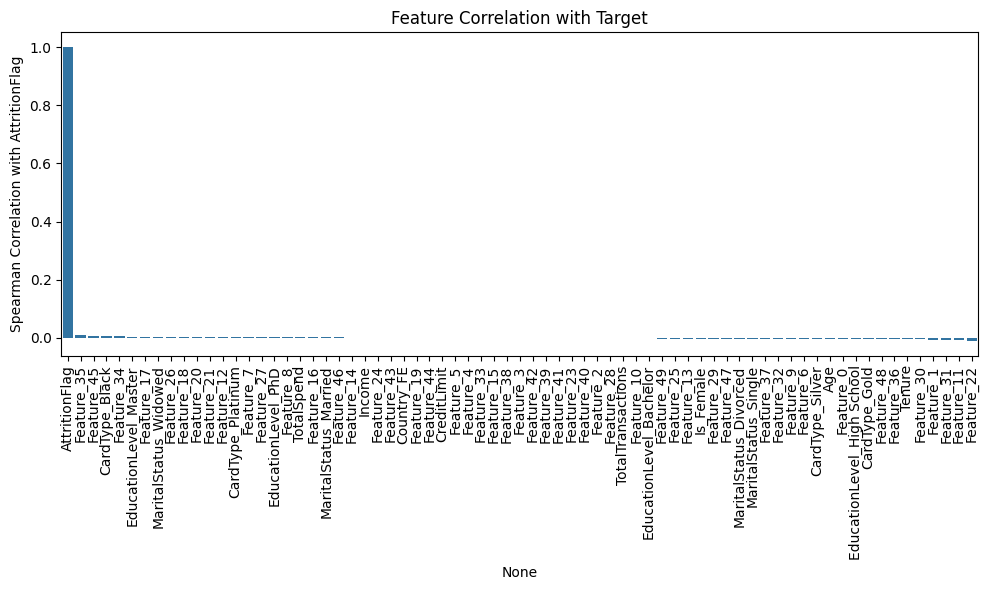

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=90)
plt.ylabel('Spearman Correlation with AttritionFlag')
plt.title('Feature Correlation with Target')
plt.tight_layout()
plt.show()

*Spearman correlation between all numeric features and `AttritionFlag` shows values extremely close to zero, indicating no significant linear or monotonic relationship. This aligns with the bivariate analysis findings, confirming that none of the features individually differentiate the target.*

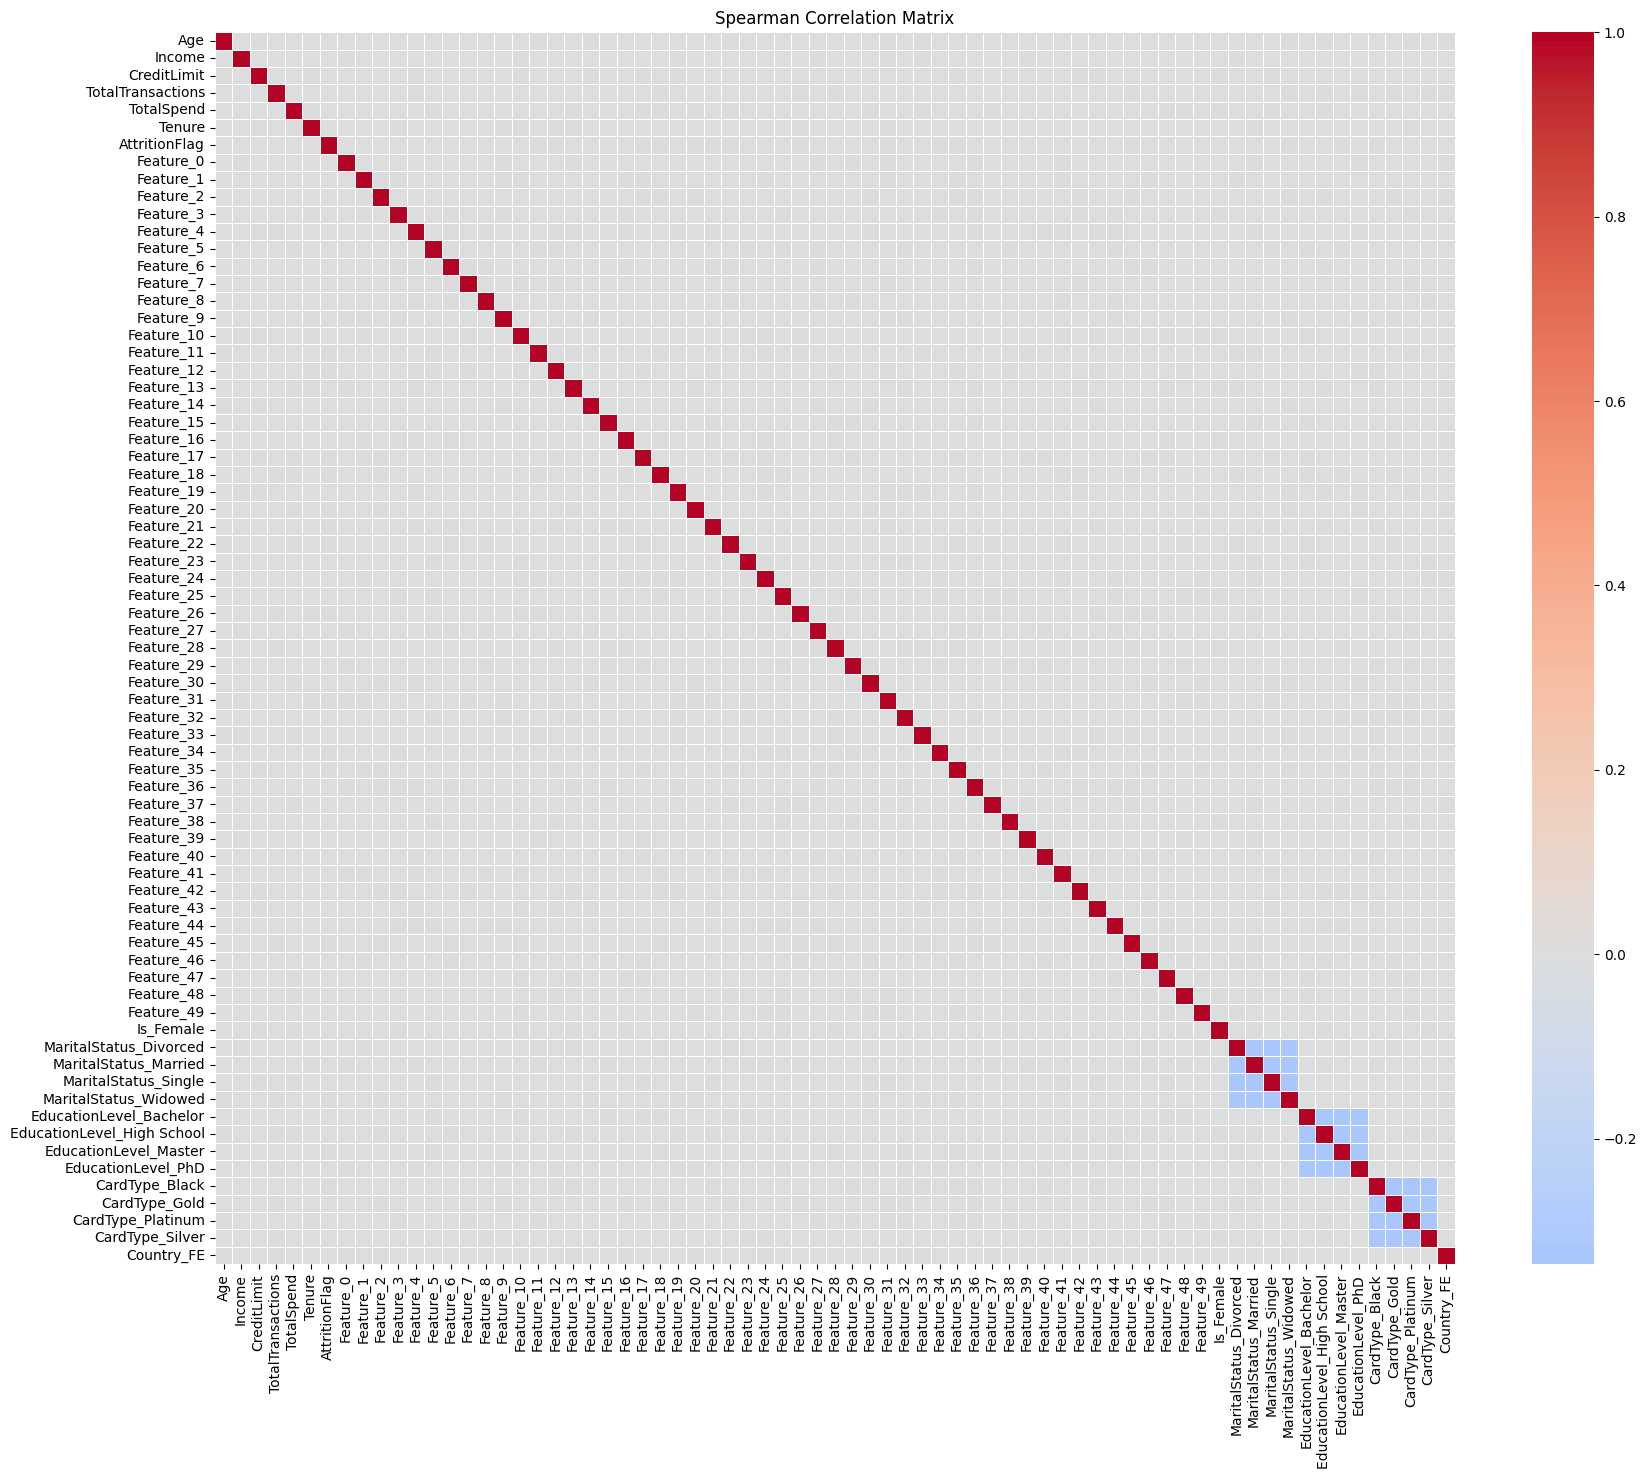

In [15]:
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

### Correlation Analysis Conclusion
*There are no notable correlations between feature-feature and feature-target relationships. The few negative correlations observed are expected, as they originate from individual columns that were one-hot encoded.*

## 3. Feature Engineering

Goal: To transform the existing dataset into a richer, more informative set of features that maximizes the model’s ability to predict attrition/churn, despite weak raw correlations.

In [16]:
df.head()

,Age,Income,CreditLimit,TotalTransactions,TotalSpend,Tenure,AttritionFlag,Feature_0,Feature_1,Feature_2,...,MaritalStatus_Widowed,EducationLevel_Bachelor,EducationLevel_High School,EducationLevel_Master,EducationLevel_PhD,CardType_Black,CardType_Gold,CardType_Platinum,CardType_Silver,Country_FE
0,45.0,112955.763499,18089.293599,102.0,7057.961760,3.0,0,-0.434767,0.119666,-0.318213,...,False,False,False,True,False,False,False,True,False,1037
1,44.0,42980.787139,17317.747673,94.0,8101.572278,9.0,0,0.538034,-0.258189,-0.903829,...,False,False,False,False,True,False,True,False,False,945
2,44.0,114584.549890,17450.444657,87.0,10168.196201,16.0,0,-0.566592,0.014330,-0.052454,...,False,True,False,False,False,False,False,False,True,1004
3,40.0,70262.608211,10444.914691,90.0,2534.813451,11.0,0,1.278177,0.288838,-0.992037,...,False,False,False,True,False,False,True,False,False,984
4,47.0,74041.286720,8022.710937,106.0,6290.093235,4.0,0,0.311488,0.109675,0.220423,...,False,False,False,False,True,False,False,True,False,1005


### Create target-independent features

In [17]:
import numpy as np

df['AvgTransaction'] = df['TotalSpend'] / np.where(df['TotalTransactions'] == 0, 1, df['TotalTransactions'])
df['CreditUsage'] = df['TotalSpend'] / np.where(df['CreditLimit'] == 0, 1, df['CreditLimit'])
df['SpendIncomeRatio'] = df['TotalSpend'] / np.where(df['Income'] == 0, 1, df['Income'])
df['TenureRatio'] = df['Tenure'] / np.where(df['Age'] == 0, 1, df['Age'])

`AvgTransaction`: Measures average spend per transaction, it normalizes spending by number of transactions to capture customer behavior.

`CreditUsage`: Indicates how much of their credit limit the customer uses; can reflect financial stress or engagement with the product.

`SpendIncomeRatio`: Shows the relative spending compared to income, which can indicate whether spending is sustainable or risky.

`TenureRatio`: Normalizes tenure by age, capturing how long a customer has been with the bank relative to their age (loyalty vs. age).

In [18]:
feature_cols = [f'Feature_{i}' for i in range(50)]

df['Feature_sum'] = df[feature_cols].sum(axis=1)
df['Feature_mean'] = df[feature_cols].mean(axis=1)
df['Feature_std'] = df[feature_cols].std(axis=1)
df['Feature_max'] = df[feature_cols].max(axis=1)
df['Feature_min'] = df[feature_cols].min(axis=1)

Aggregates condense high-dimensional features into summary statistics:

sum: total activity/score across all features

mean: average behavior across features

std: variability of behavior

max/min: capture extremes or outliers

Helps reduce dimensionality and captures overall trends in customer behavior.

In [19]:
#Checking for skewness

num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('AttritionFlag')  # exclude target

skew_values = df[num_cols].skew().sort_values(ascending=False)
print(skew_values.head(20))  # top 20 most skewed features

CreditUsage          3.968509
SpendIncomeRatio     1.999175
TenureRatio          0.755932
Feature_min          0.276810
AvgTransaction       0.235494
TotalSpend           0.093278
Income               0.089499
TotalTransactions    0.082847
Feature_std          0.040158
Feature_0            0.010119
Feature_5            0.009249
Feature_24           0.009137
Feature_1            0.007324
Feature_15           0.006825
Feature_40           0.005819
Feature_29           0.005512
Feature_20           0.005231
Feature_47           0.005166
Feature_13           0.004928
Feature_33           0.004714
dtype: float64


In [20]:
for col in ['CreditUsage', 'SpendIncomeRatio']:  # only skewed features
    min_val = df[col].min()
    if min_val <= 0:
        df[col + '_log'] = np.log1p(df[col] - min_val + 1)
    else:
        df[col + '_log'] = np.log1p(df[col])

*Since `CreditUsage` and `SpendIncomeRatio` are highly-skewed, we perform a log transformation (with a shift if necessary) to reduce skewness and make the distributions more suitable for modeling.*

In [21]:
df.shape

(100000, 82)

In [22]:
df.columns

Index(['Age', 'Income', 'CreditLimit', 'TotalTransactions', 'TotalSpend',
       'Tenure', 'AttritionFlag', 'Feature_0', 'Feature_1', 'Feature_2',
       'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
       'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12',
       'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
       'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22',
       'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26', 'Feature_27',
       'Feature_28', 'Feature_29', 'Feature_30', 'Feature_31', 'Feature_32',
       'Feature_33', 'Feature_34', 'Feature_35', 'Feature_36', 'Feature_37',
       'Feature_38', 'Feature_39', 'Feature_40', 'Feature_41', 'Feature_42',
       'Feature_43', 'Feature_44', 'Feature_45', 'Feature_46', 'Feature_47',
       'Feature_48', 'Feature_49', 'Is_Female', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'Educ

In [23]:
df.head()

,Age,Income,CreditLimit,TotalTransactions,TotalSpend,Tenure,AttritionFlag,Feature_0,Feature_1,Feature_2,...,CreditUsage,SpendIncomeRatio,TenureRatio,Feature_sum,Feature_mean,Feature_std,Feature_max,Feature_min,CreditUsage_log,SpendIncomeRatio_log
0,45.0,112955.763499,18089.293599,102.0,7057.961760,3.0,0,-0.434767,0.119666,-0.318213,...,0.390173,0.062484,0.066667,8.960160,0.179203,0.977332,2.178751,-1.792390,0.891206,0.726758
1,44.0,42980.787139,17317.747673,94.0,8101.572278,9.0,0,0.538034,-0.258189,-0.903829,...,0.467819,0.188493,0.204545,-4.361951,-0.087239,0.910828,2.002470,-1.929952,0.922556,0.785896
2,44.0,114584.549890,17450.444657,87.0,10168.196201,16.0,0,-0.566592,0.014330,-0.052454,...,0.582690,0.088740,0.363636,-5.533819,-0.110676,0.842266,1.807094,-2.086456,0.967206,0.739372
3,40.0,70262.608211,10444.914691,90.0,2534.813451,11.0,0,1.278177,0.288838,-0.992037,...,0.242684,0.036076,0.275000,-3.868522,-0.077370,0.804791,1.502226,-2.131752,0.828804,0.713909
4,47.0,74041.286720,8022.710937,106.0,6290.093235,4.0,0,0.311488,0.109675,0.220423,...,0.784036,0.084954,0.085106,-11.208589,-0.224172,0.908058,1.118082,-2.701428,1.040958,0.737563


*Checking if there are correlations between features with newly added ones.*

In [24]:
# Only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Compute correlation with target
corr_with_target = df[numeric_cols].corr()['AttritionFlag'].sort_values(ascending=False)

# Show top 10 positively and negatively correlated features
print("Top positive correlations:\n", corr_with_target.head(10))
print("\nTop negative correlations:\n", corr_with_target.tail(10))


Top positive correlations:
 AttritionFlag      1.000000
Feature_35         0.009207
Feature_45         0.007615
Feature_34         0.005218
Feature_17         0.004605
CreditUsage        0.004400
Feature_26         0.004116
CreditUsage_log    0.003910
Feature_12         0.003434
Feature_21         0.003277
Name: AttritionFlag, dtype: float64

Top negative correlations:
 Feature_48     -0.005021
Tenure         -0.005174
Feature_30     -0.005667
Feature_1      -0.005694
Feature_sum    -0.005729
Feature_mean   -0.005729
Feature_36     -0.005746
Feature_11     -0.007561
Feature_31     -0.008156
Feature_22     -0.010878
Name: AttritionFlag, dtype: float64


In [25]:
corr_spearman = df.corr(method='spearman')['AttritionFlag'].sort_values(ascending=False)
print("Top positive correlations:\n", corr_spearman.head(10))
print("\nTop negative correlations:\n", corr_spearman.tail(10))

Top positive correlations:
 AttritionFlag            1.000000
Feature_35               0.008626
Feature_45               0.006465
CardType_Black           0.005869
Feature_34               0.005443
EducationLevel_Master    0.004201
Feature_17               0.004144
MaritalStatus_Widowed    0.004117
Feature_26               0.004028
Feature_18               0.003892
Name: AttritionFlag, dtype: float64

Top negative correlations:
 Feature_48     -0.004758
Feature_36     -0.005149
Tenure         -0.005175
Feature_30     -0.005562
Feature_1      -0.005980
Feature_mean   -0.006493
Feature_sum    -0.006493
Feature_31     -0.008129
Feature_11     -0.008727
Feature_22     -0.010513
Name: AttritionFlag, dtype: float64


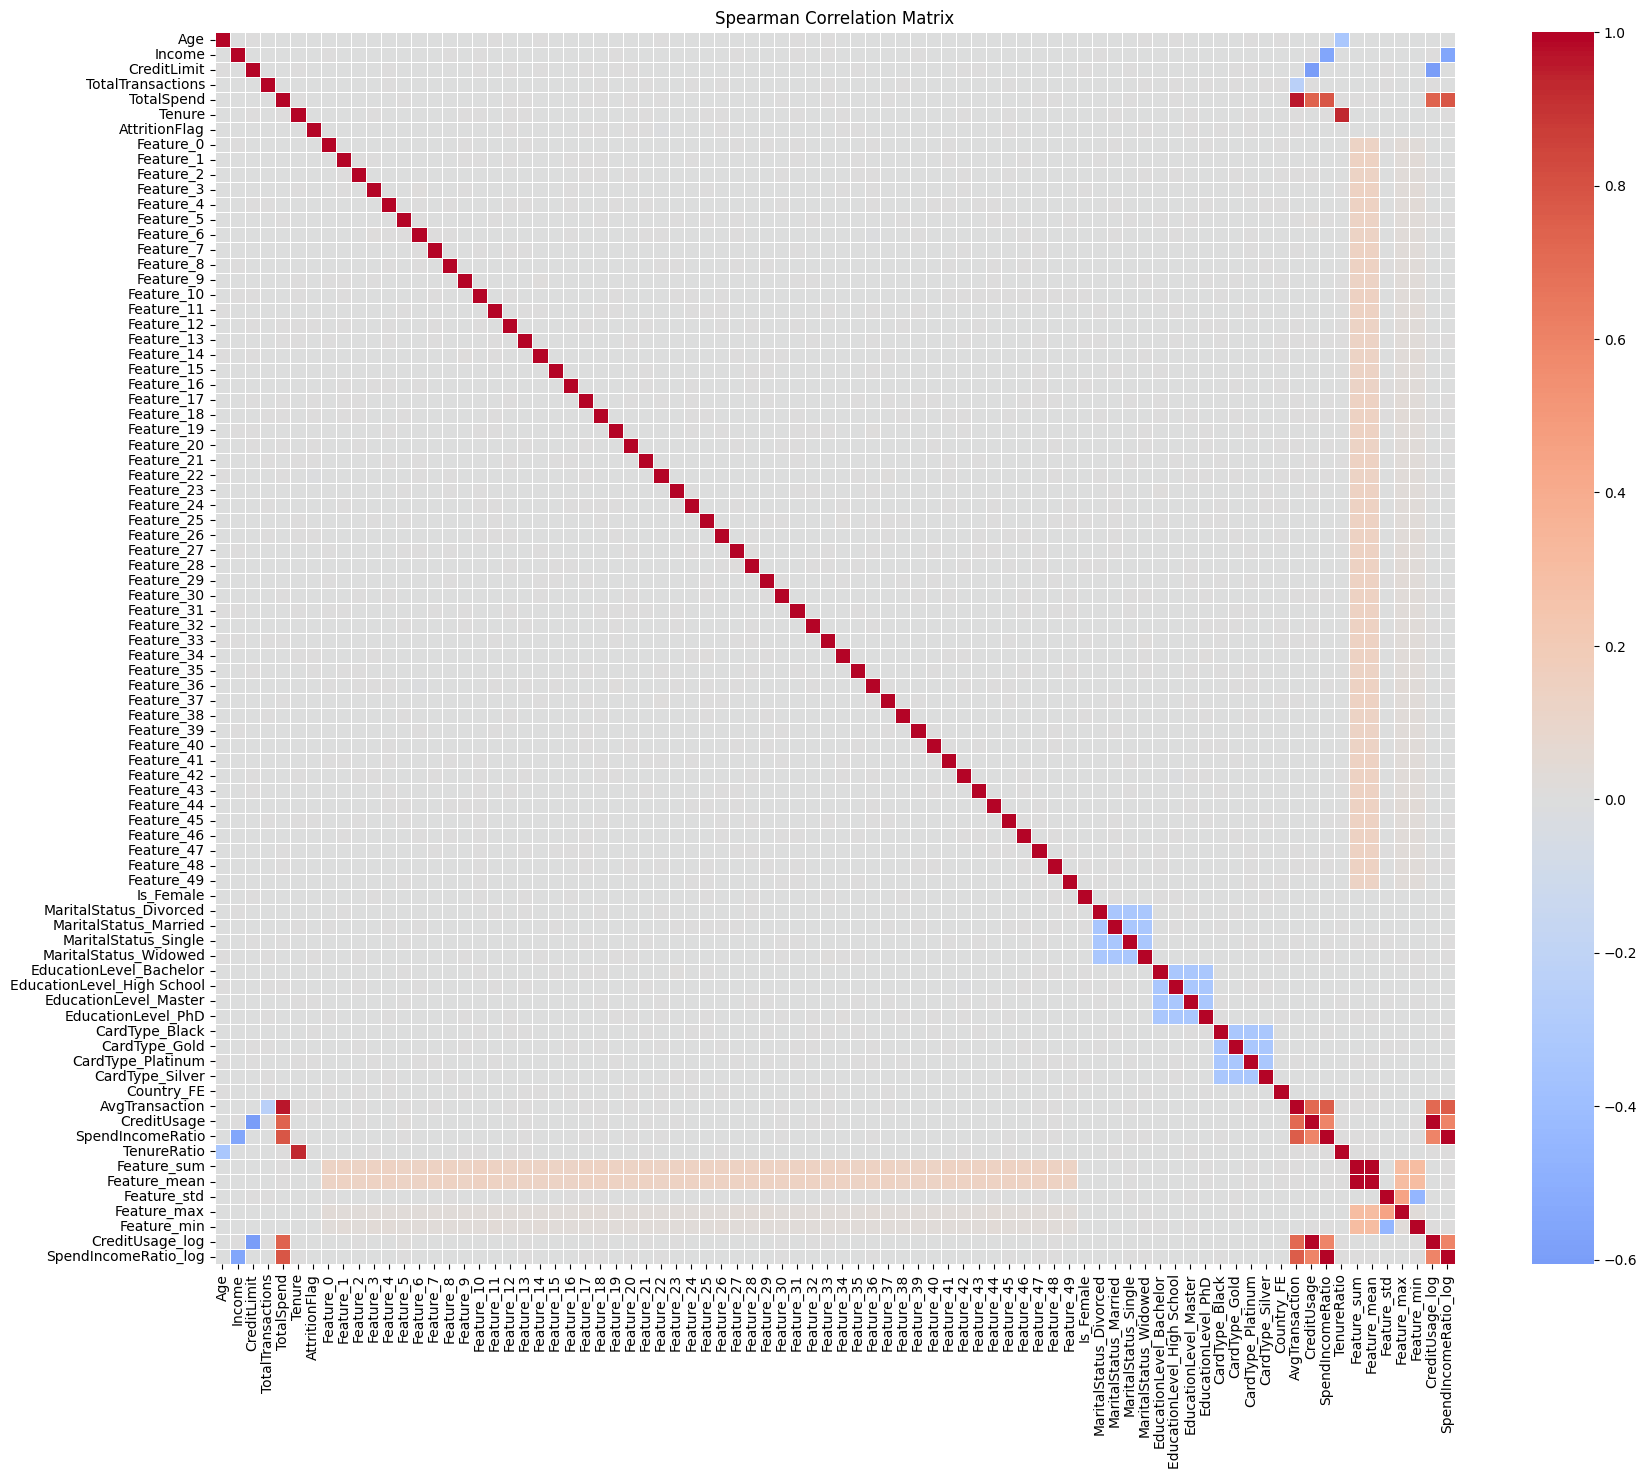

In [26]:
# Spearman correlation
corr_matrix = df.corr(method='spearman')

plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

All numeric features, including engineered ones, show very low correlations with the target (highest ~0.009, lowest ~-0.005).

Even features with low correlation are kept, as they may still contribute in combination with others or capture non-linear relationships.

This suggests that churn is likely driven by complex interactions, so feature engineering and non-linear models may be important.

### Create target-dependent features

### *Split dataset first to avoid data leakage since this will involve the target variable `AttritionFlag`*

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['AttritionFlag'])
y = df['AttritionFlag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
train_df = X_train.join(y_train)

# Example: churn rate per card type
card_cols = ['CardType_Black', 'CardType_Gold', 'CardType_Platinum', 'CardType_Silver']
for col in card_cols:
    churn_rate = train_df.groupby(col)['AttritionFlag'].mean()
    X_train[col + '_ChurnRate'] = X_train[col].map(churn_rate)
    X_test[col + '_ChurnRate'] = X_test[col].map(churn_rate)

In [29]:
numeric_feats = ['TotalSpend', 'CreditUsage', 'AvgTransaction']
mean_churned = train_df[train_df['AttritionFlag']==1][numeric_feats].mean()

for feat in numeric_feats:
    X_train[feat+'_diff_churn'] = X_train[feat] - mean_churned[feat]
    X_test[feat+'_diff_churn'] = X_test[feat] - mean_churned[feat]


In [30]:
# Combine X_train and y_train for saving
train_save = X_train.copy()
train_save['AttritionFlag'] = y_train
train_save.to_csv(r'..\..\data\processed\train.csv', index=False)

# Combine X_test and y_test for saving
test_save = X_test.copy()
test_save['AttritionFlag'] = y_test
test_save.to_csv(r'..\..\data\processed\test.csv', index=False)

In [31]:
train_save.head()

,Age,Income,CreditLimit,TotalTransactions,TotalSpend,Tenure,Feature_0,Feature_1,Feature_2,Feature_3,...,CreditUsage_log,SpendIncomeRatio_log,CardType_Black_ChurnRate,CardType_Gold_ChurnRate,CardType_Platinum_ChurnRate,CardType_Silver_ChurnRate,TotalSpend_diff_churn,CreditUsage_diff_churn,AvgTransaction_diff_churn,AttritionFlag
21951,53.0,93217.250086,23271.872700,101.0,5029.232703,6.0,-0.887064,1.370063,0.656958,0.374404,...,0.817134,0.722625,0.048826,0.049947,0.048812,0.049761,-51.449729,-0.187215,-1.477249,0
88391,23.0,85356.010770,14981.859704,87.0,2965.051947,11.0,-1.651973,-1.311519,-0.320069,1.628036,...,0.809063,0.713253,0.048826,0.049947,0.048812,0.049761,-2115.630485,-0.205413,-17.190576,1
68595,47.0,53965.796788,14188.365402,97.0,7079.236252,12.0,0.120096,-1.521387,0.230021,0.536312,...,0.934853,0.759431,0.048826,0.049947,0.048812,0.049761,1998.553820,0.095624,21.710185,0
75303,38.0,42432.758570,18818.098531,97.0,6963.458820,6.0,1.178099,-1.558062,0.133639,0.509329,...,0.882914,0.774721,0.048826,0.049947,0.049864,0.049113,1882.776388,-0.033282,20.516603,0
39265,47.0,62947.041713,12951.278261,103.0,6452.274460,16.0,-0.588913,-1.432143,1.899889,0.486777,...,0.934559,0.745922,0.051906,0.049947,0.049864,0.049761,1371.592028,0.094873,11.371809,0
